In [783]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [784]:
dataset = pd.read_csv("C:/Users/20109/OneDrive/Documents/Loan-prediction/train4.csv")
print(dataset.head())

    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0   

In [785]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
None


In [786]:
print(dataset.isnull().sum())

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [787]:
#filling up categorical misising values
cols=["Gender","Married","Self_Employed"]
for col in cols:
  dataset[col] = dataset[col].fillna(dataset[col].mode()[0])

In [788]:
print(dataset.isnull().sum())

Loan_ID               0
Gender                0
Married               0
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


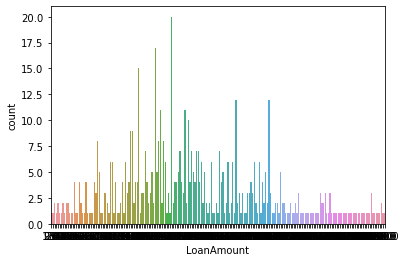

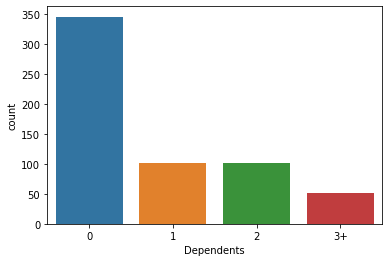

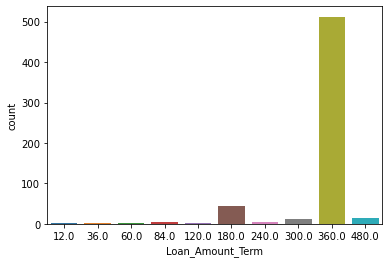

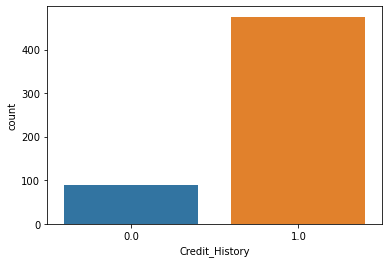

In [789]:
cols1=["LoanAmount","Dependents","Loan_Amount_Term","Credit_History"]
#to see the frequencies to use mode or no
for col1 in cols1:
    sns.countplot( x=col1 , data=dataset)
    plt.show()

In [790]:
# filling numerical values . in this step filling with mode was the best choice for chosen columns  
for col2 in cols1[1:4] :
    dataset[col2] = dataset[col2].fillna(dataset[col2].mode()[0])

<AxesSubplot:xlabel='LoanAmount'>

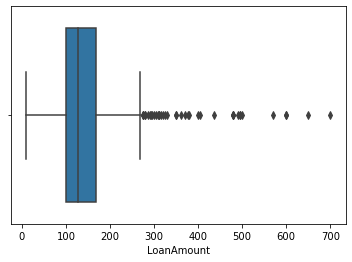

In [791]:
#we can not replace loan amount with mode because here mean or median will be better . but we have to check for outliers
sns.boxplot(x="LoanAmount", data=dataset)

In [792]:
#we want to extract outliers so we will follow these steps:
#  Calculate the first and third quartile (Q1 and Q3).
# evaluate the interquartile range, IQR = Q3-Q1.
#Estimate the lower bound, the lower bound = Q1*1.5
#Estimate the upper bound, upper bound = Q3*1.5
#Replace the data points that lie outside of the lower and the upper bound with a NULL value.

In [793]:
Q1 = dataset['LoanAmount'].quantile(0.25)
Q3 = dataset['LoanAmount'].quantile(0.75)
IQR = Q3 - Q1
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR

outliers = []
for x in dataset['LoanAmount']:
    if ((x > up_lim) or (x < low_lim)):
         outliers.append(x)
percent=len(outliers)/len(dataset['LoanAmount'])*100
print(f"the percentage of outliers = {percent:4.2f} %") 

the percentage of outliers = 6.35 %


In [794]:
#we can't remove the outliers as it represent 6.35 % of the column
#median is our best choice as it's not affected by outliers

In [795]:
dataset['LoanAmount']=dataset['LoanAmount'].fillna(dataset['LoanAmount'].median())

In [796]:
print(dataset.isnull().sum())

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


In [797]:
#label encoding for categorical data
from sklearn.preprocessing import LabelEncoder
cols = ['Gender',"Married","Education",'Self_Employed',"Property_Area","Loan_Status"]
le = LabelEncoder()
for col in cols:
    dataset[col] = le.fit_transform(dataset[col])
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


In [798]:
#getting to know more about the dataset
dataset['Total_Income'] = dataset['ApplicantIncome'] + dataset['CoapplicantIncome'] #compress 2 columns in one

<AxesSubplot:xlabel='Dependents', ylabel='count'>

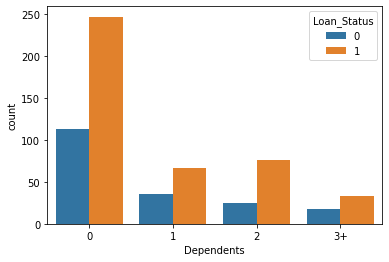

In [799]:
sns.countplot(x="Dependents", hue="Loan_Status", data=dataset)

In [800]:
d_cols = ['ApplicantIncome', 'CoapplicantIncome',  "Loan_Amount_Term",'Loan_ID',"Dependents"]
dataset = dataset.drop(columns=d_cols, axis=1)
print(dataset.head())

   Gender  Married  Education  Self_Employed  LoanAmount  Credit_History  \
0       1        0          0              0       128.0             1.0   
1       1        1          0              0       128.0             1.0   
2       1        1          0              1        66.0             1.0   
3       1        1          1              0       120.0             1.0   
4       1        0          0              0       141.0             1.0   

   Property_Area  Loan_Status  Total_Income  
0              2            1        5849.0  
1              0            0        6091.0  
2              2            1        3000.0  
3              2            1        4941.0  
4              2            1        6000.0  


In [801]:
x= dataset.loc[:, ["Gender","Married","Education","Self_Employed","LoanAmount","Credit_History","Property_Area","Total_Income"]].values
y = dataset.iloc[:, -2].values


In [802]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25 , random_state=0)

In [803]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x_train = ss.fit_transform(x_train)
x_test = ss.transform(x_test)

In [804]:
from sklearn.decomposition import PCA
dataset1 = PCA(n_components=5)
pc_data = dataset1.fit_transform(x_train)
pc_data1 = dataset1.fit_transform(x_test)

print('Explained variation per principal component: {}'.format(dataset1.explained_variance_ratio_))

Explained variation per principal component: [0.22137174 0.1790152  0.14778236 0.12977417 0.10943651]


In [818]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0) 
classifier.fit(pc_data, y_train)

SVC(random_state=0)

In [819]:
y_pred = classifier.predict(pc_data1)
from sklearn.model_selection import cross_val_score

print("Accuracy is", classifier.score(pc_data1, y_test)*100)

Accuracy is 80.51948051948052


In [820]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 16  27]
 [  3 108]]
